In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Load

In [21]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# 2. X와 y 분리

In [22]:
# dataset을 ndarray로 변환
salary = dataset.values
salary

array([['Business Analyst', 1, 45000],
       ['Junior Consultant', 2, 50000],
       ['Senior Consultant', 3, 60000],
       ['Manager', 4, 80000],
       ['Country Manager', 5, 110000],
       ['Region Manager', 6, 150000],
       ['Partner', 7, 200000],
       ['Senior Partner', 8, 300000],
       ['C-level', 9, 500000],
       ['CEO', 10, 1000000]], dtype=object)

In [23]:
# X: Level, y: Salary
# Level입력에 대해 Salary를 예측하는 regression model

# X는 모든 행, 두 번째(index=1) 열
# X는 반드시 2D array가 되어야 함
# 2D array가 되기 위해서는 행과 열 모두 범위로 표기해야 함
X = salary[:, 1:2]

# y는 모든 행, 마지막(index=2 or -1) 열
y = salary[:, -1]

In [24]:
print(X.shape, y.shape)

(10, 1) (10,)


# 3. Training data와 Test data 분리

In [25]:
# train:test = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7, 1) (3, 1) (7,) (3,)


# 4. Polynomial features

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures 객체 생성 시 degree 입력
pf = PolynomialFeatures(degree=1)

# fit: PolynomialFeatures로 확장하기 위한 전략 수립(실제 변환 X)
pf.fit(X_train)

# transform: 반드시 fit 실행 후 변환(transform)해야 함
Xp_train = pf.transform(X_train)

# 5. Linear Regression 학습

In [28]:
from sklearn.linear_model import LinearRegression

# LinearRegression을 학습(fit)할 때, PolynomialFeatures를 사용하면 Polynomial Regression인 것임
p_lr = LinearRegression()
p_lr.fit(Xp_train, y_train)

LinearRegression()

# 6. Prediction(X_test에 대한 예측값)

In [29]:
# predict에 적용되는 X_test는 반드시 학습에서 적용한 PolynomialFeatures 형태로 변환해야 함
Xp_test = pf.transform(X_test)
y_pred = p_lr.predict(Xp_test)

# 7. 성능 확인(mean_squared_error, r2_score)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

110713.69636963708
0.6387183859096337


# 8. 결과 시각화

In [32]:
np.arange(1, 11, 0.1)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9])

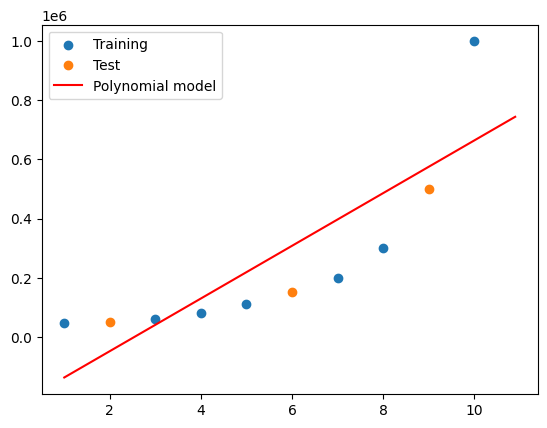

In [34]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

# np.arange(1, 11, 0.1): 1부터 11 사이의 값을 0.1 간격으로 생성(11은 포함 X)
# np.arange(1, 11, 0.1).reshape(-1, 1): 위의 결과를 1열로 구성된 2D array로 변환
X_sample = np.arange(1, 11, 0.1).reshape(-1, 1)

Xp_sample = pf.transform(X_sample)
y_sample_pred = p_lr.predict(Xp_sample)

plt.plot(X_sample, y_sample_pred, color='red')
plt.legend(['Training', 'Test', 'Polynomial model'])